In [17]:
#Librerías y módulos
import tensorflow as tf
import numpy as np

from tensorflow.keras import datasets, layers, models 
from tensorflow.keras.utils import to_categorical 
import matplotlib.pyplot as plt

In [18]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data(path='mnist.npz') #Cargando el dataset MNIST
train_images, test_images = train_images / 255.0, test_images / 255.0

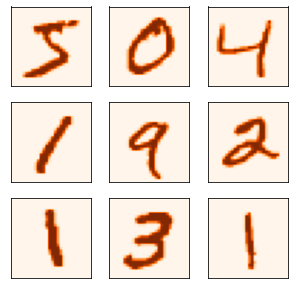

In [19]:
#Dimensionamos las imagenes
plt.figure(figsize=(5,5))                     
for i in range(9):                            
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='Oranges') #Muestreo y color
plt.show()

In [20]:
(train_images.shape, train_labels.shape), (test_images.shape, test_labels.shape) #Tamaño del Dataset

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

In [21]:
#Entrenando
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

#Codificando la variable deseada
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [22]:
#Arquitectura del modelo
model = models.Sequential()
model.add(layers.Conv2D(4, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2), strides=2))
model.add(layers.Conv2D(4, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=2))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 4)         40        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 4)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 4)         148       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 4)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 1,198
Trainable params: 1,198
Non-trainable params: 0
____________________________________________________

In [24]:
#Compilación del modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
#Entrenamiento de nuestro modelo
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.4992 - accuracy: 0.8417 - val_loss: 0.2203 - val_accuracy: 0.9314
Epoch 2/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2024 - accuracy: 0.9376 - val_loss: 0.1623 - val_accuracy: 0.9503
Epoch 3/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1608 - accuracy: 0.9500 - val_loss: 0.1315 - val_accuracy: 0.9584
Epoch 4/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1371 - accuracy: 0.9570 - val_loss: 0.1196 - val_accuracy: 0.9636
Epoch 5/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1225 - accuracy: 0.9625 - val_loss: 0.1175 - val_accuracy: 0.9619
Epoch 6/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1116 - accuracy: 0.9655 - val_loss: 0.0945 - val_accuracy: 0.9708
Epoch 7/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1038 - accuracy: 0.9684 - val_loss: 0.0900 -

In [15]:
from PIL import Image
from keras_preprocessing import image
from keras.preprocessing.image import load_img, img_to_array

def predi(numero):
  x = image.load_img(numero, target_size=(28, 28))
  plt.imshow(x)

  x = image.img_to_array(x)        
  x = tf.image.rgb_to_grayscale(x) 
  x = np.expand_dims(x, axis=0)    
  x = x/255.0

  prediccion = model.predict(x) 
  a = prediccion [0][0]
  for i in range (0,10):
      b = prediccion [0][i]
  print("El número es: ", np.argmax(prediccion[0]))
  return

El número es:  0


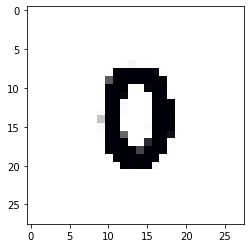

In [37]:
predi("0.jpg")